In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string

In [2]:
emails = pd.read_csv("emails.csv")
emails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
emails.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [4]:
##  data cleaning
def email_cleaner(text):
    
    text = re.sub(r'<[^<>]+>', ' ', text) #handling HTML
    text = re.sub(r'(http|https)://[^\s]*', 'httpaddr ', text) #handling urls
    text = re.sub(r'[^\s]+@[^\s]+','emailaddr ', text) #handling email addrss
    text = re.sub(r'[0-9]+', 'number ', text) #handling numbers
    text = re.sub(r'[$]+','dollar ', text) #handling $ sign
    text = re.sub(r'[\n]+',' ', text) #removing newlines
    text = re.sub(r'[{0}]'.format(string.punctuation),' ', text) # removing punction
    return text.lower() # return the lower case of the text





In [5]:
emails.text = emails.text.apply(lambda x: email_cleaner(x)[7:]) #the [:7] removes the subject from the email

In [6]:
emails

,text,spam
0,naturally irresistible your corporate identi...,1
1,the stock trading gunslinger fanny is merri...,1
2,unbelievable new homes made easy im wanting...,1
3,number color printing special request addi...,1
4,do not have money get software cds from he...,1
...,...,...
5723,re research and development charges to gpg...,0
5724,re receipts from visit jim thanks agai...,0
5725,re enron case study update wow all on t...,0
5726,re interest david please call shirle...,0


In [7]:
emails

,text,spam
0,naturally irresistible your corporate identi...,1
1,the stock trading gunslinger fanny is merri...,1
2,unbelievable new homes made easy im wanting...,1
3,number color printing special request addi...,1
4,do not have money get software cds from he...,1
...,...,...
5723,re research and development charges to gpg...,0
5724,re receipts from visit jim thanks agai...,0
5725,re enron case study update wow all on t...,0
5726,re interest david please call shirle...,0


In [8]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [9]:
#tokenzizing 
emails.text = emails.text.apply(lambda words: word_tokenize(words))
emails.text

0       [naturally, irresistible, your, corporate, ide...
1       [the, stock, trading, gunslinger, fanny, is, m...
2       [unbelievable, new, homes, made, easy, im, wan...
3       [number, color, printing, special, request, ad...
4       [do, not, have, money, get, software, cds, fro...
                              ...                        
5723    [re, research, and, development, charges, to, ...
5724    [re, receipts, from, visit, jim, thanks, again...
5725    [re, enron, case, study, update, wow, all, on,...
5726    [re, interest, david, please, call, shirley, c...
5727    [news, aurora, number, number, update, aurora,...
Name: text, Length: 5728, dtype: object

In [10]:
emails

,text,spam
0,"[naturally, irresistible, your, corporate, ide...",1
1,"[the, stock, trading, gunslinger, fanny, is, m...",1
2,"[unbelievable, new, homes, made, easy, im, wan...",1
3,"[number, color, printing, special, request, ad...",1
4,"[do, not, have, money, get, software, cds, fro...",1
...,...,...
5723,"[re, research, and, development, charges, to, ...",0
5724,"[re, receipts, from, visit, jim, thanks, again...",0
5725,"[re, enron, case, study, update, wow, all, on,...",0
5726,"[re, interest, david, please, call, shirley, c...",0


In [11]:
# #removing stop words
def stoppers (text):
    text = [word for word in text if not word in stopwords.words('english')]
    return text


emails.text = emails.text.apply(lambda words: list(filter(lambda words: words not in stopwords.words('english'), words)))

In [12]:
emails['text'] = emails['text'].apply(lambda words: [word for word in words if not word in stopwords.words('english')])

In [13]:
emails.text

0       [naturally, irresistible, corporate, identity,...
1       [stock, trading, gunslinger, fanny, merrill, m...
2       [unbelievable, new, homes, made, easy, im, wan...
3       [number, color, printing, special, request, ad...
4       [money, get, software, cds, software, compatib...
                              ...                        
5723    [research, development, charges, gpg, forwarde...
5724    [receipts, visit, jim, thanks, invitation, vis...
5725    [enron, case, study, update, wow, day, super, ...
5726    [interest, david, please, call, shirley, crens...
5727    [news, aurora, number, number, update, aurora,...
Name: text, Length: 5728, dtype: object

In [14]:
#Lemmatizing
from nltk import WordNetLemmatizer
stem = WordNetLemmatizer()
emails.text = emails.text.apply(lambda words: [stem.lemmatize(word) for word  in words])

In [15]:
emails

,text,spam
0,"[naturally, irresistible, corporate, identity,...",1
1,"[stock, trading, gunslinger, fanny, merrill, m...",1
2,"[unbelievable, new, home, made, easy, im, want...",1
3,"[number, color, printing, special, request, ad...",1
4,"[money, get, software, cd, software, compatibi...",1
...,...,...
5723,"[research, development, charge, gpg, forwarded...",0
5724,"[receipt, visit, jim, thanks, invitation, visi...",0
5725,"[enron, case, study, update, wow, day, super, ...",0
5726,"[interest, david, please, call, shirley, crens...",0


In [16]:
#getting pose tags
from nltk import pos_tag
tags = emails.text.apply(lambda words: [pos[1] for pos in pos_tag(words)])

In [17]:
#rejoining the text
emails.text = emails.text.apply(lambda words: ' '.join(words))

In [18]:
#vectorizing
from sklearn.feature_extraction.text import CountVectorizer
vectorer = CountVectorizer()
X = vectorer.fit_transform(emails.text).toarray()
y= emails.spam.values.reshape(-1, 1)

In [19]:
X.shape

(5728, 30933)

In [20]:
y.plot.kde()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, f1_score, plot_confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42, stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4582, 30933)
(1146, 30933)
(4582, 1)
(1146, 1)


In [ ]:
#without stratify
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(model.score(y_test, pred))
print(f1_score(y_test, pred))
print(confusion_matrix(y_test, pred))

C:\Users\Abraham T Owos\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.04363001745200698
0.9103942652329748
[[842  14]
 [ 36 254]]


In [ ]:
#without stratify
model = MultinomialNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
print(f1_score(y_test, pred))
print(confusion_matrix(y_test, pred))

C:\Users\Abraham T Owos\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       856
           1       0.98      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

0.982876712328767
[[849   7]
 [  3 287]]


C:\Users\Abraham T Owos\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       872
           1       0.96      1.00      0.98       274

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

0.9785714285714286


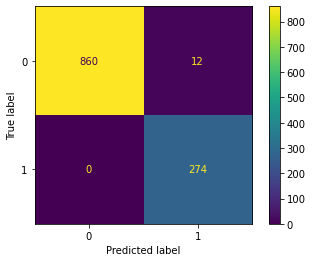

In [ ]:
#with stratify
model = MultinomialNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
print(f1_score(y_test, pred))
print(plot_confusion_matrix(model, X_test, y_test))

In [ ]:
I will go with this last one because I want false  to be as high as possible